In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['WA_Fn-UseC_-Telco-Customer-Churn.csv']


# Import packages

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import matplotlib.cm as cm

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import VotingClassifier

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [61]:
telcom=pd.read_csv("../input/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Exploratory Data Analysis

### **A Brief Overview of The Data**

In [62]:
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [63]:
#A brief overview of our data value
telcom.shape

(7043, 21)

There are 7043 rows of telecom customer dataset, 21 columns, including 20 variables and 1 target column "Churn"

In [64]:
#Search missing value
pd.isnull(telcom).sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Here is no null value data. 

In [65]:
telcom["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

There are 5174 "No" and 1869 "Yes" in Churn, the dataset is imbalanced.

In [66]:
telcom.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Since TotalCharges supposed to be numerical data rather than object, we need to convert it to float.

In [67]:
telcom['TotalCharges']=telcom['TotalCharges'].convert_objects(convert_numeric=True)
telcom["TotalCharges"].dtypes

dtype('float64')

Check if TotalCharges has missing value.

In [68]:
pd.isnull(telcom["TotalCharges"]).sum()

11

There are 11 missing values in TotalCharges variable, which is not a big amount. We can drop these rows directly.

In [69]:
telcom.dropna(inplace=True)
telcom.shape

(7032, 21)

In [70]:
telcomdata=telcom

We also need to replace the value of Churn column using "1" for "Yes" and "0" for "No"

In [71]:
telcom['Churn'].replace(to_replace='Yes', value=1, inplace=True)
telcom['Churn'].replace(to_replace='No',  value=0, inplace=True)
telcom['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

### **Data Visualization**

Firstly, we can check our the proportions of "Churn".

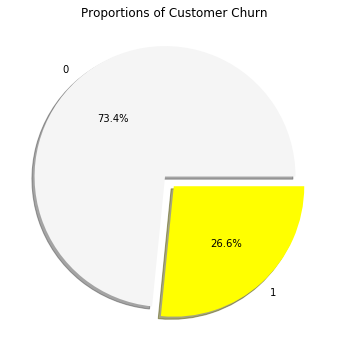

In [72]:
churnvalue=telcom["Churn"].value_counts()
labels=telcom["Churn"].value_counts().index

rcParams["figure.figsize"]=6,6
plt.pie(churnvalue,labels=labels,colors=["whitesmoke","yellow"], explode=(0.1,0),autopct='%1.1f%%', shadow=True)
plt.title("Proportions of Customer Churn")
plt.show()

### **Feature Revelance**

In [73]:
tel_dummies = pd.get_dummies(telcom.iloc[:,1:21])
tel_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


Text(0.5, 1.0, 'Correlations between Churn and variables')

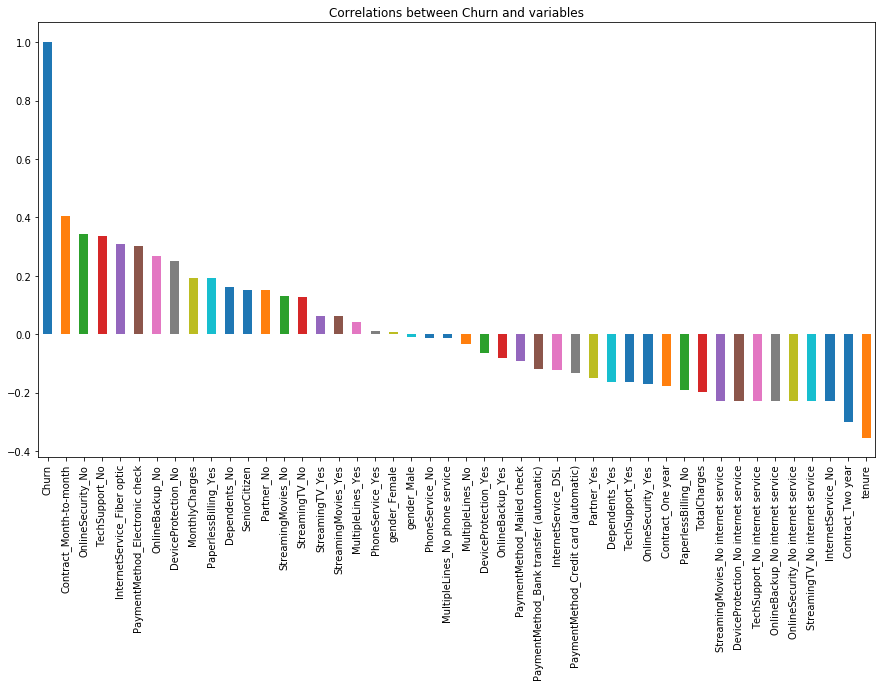

In [74]:
plt.figure(figsize=(15,8))
tel_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.title("Correlations between Churn and variables")

In the middle of the crrelation diagram, the dummie values of "gender" and "PhoneService" are approaching 0, which means these two variables have very low correlation that influencing "Churn" prediction.

We can drop them as they are not influential factors on determining churn or not churn.

Text(0.5, 1.0, 'Churn by MultipleLines')

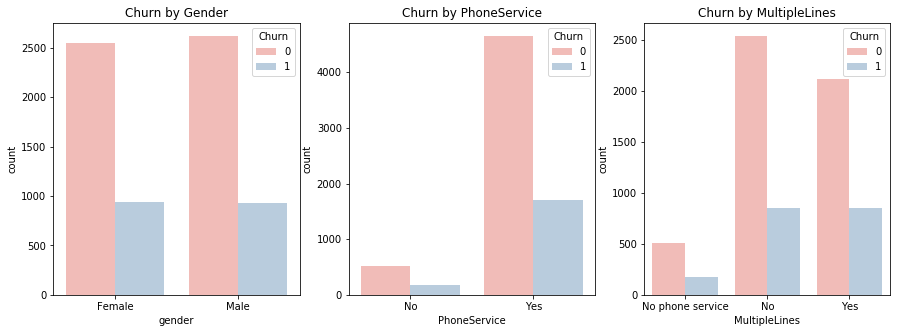

In [75]:
f, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

plt.subplot(1,3,1)
gender=sns.countplot(x="gender",hue="Churn",data=telcom,palette="Pastel1")
plt.xlabel("gender")
plt.title("Churn by Gender")

plt.subplot(1,3,2)
gender=sns.countplot(x="PhoneService",hue="Churn",data=telcom,palette="Pastel1")
plt.xlabel("PhoneService")
plt.title("Churn by PhoneService")

plt.subplot(1,3,3)
gender=sns.countplot(x="MultipleLines",hue="Churn",data=telcom,palette="Pastel1")
plt.xlabel("MultipleLines")
plt.title("Churn by MultipleLines")

Text(0.5, 1.0, 'Correlation between variables')

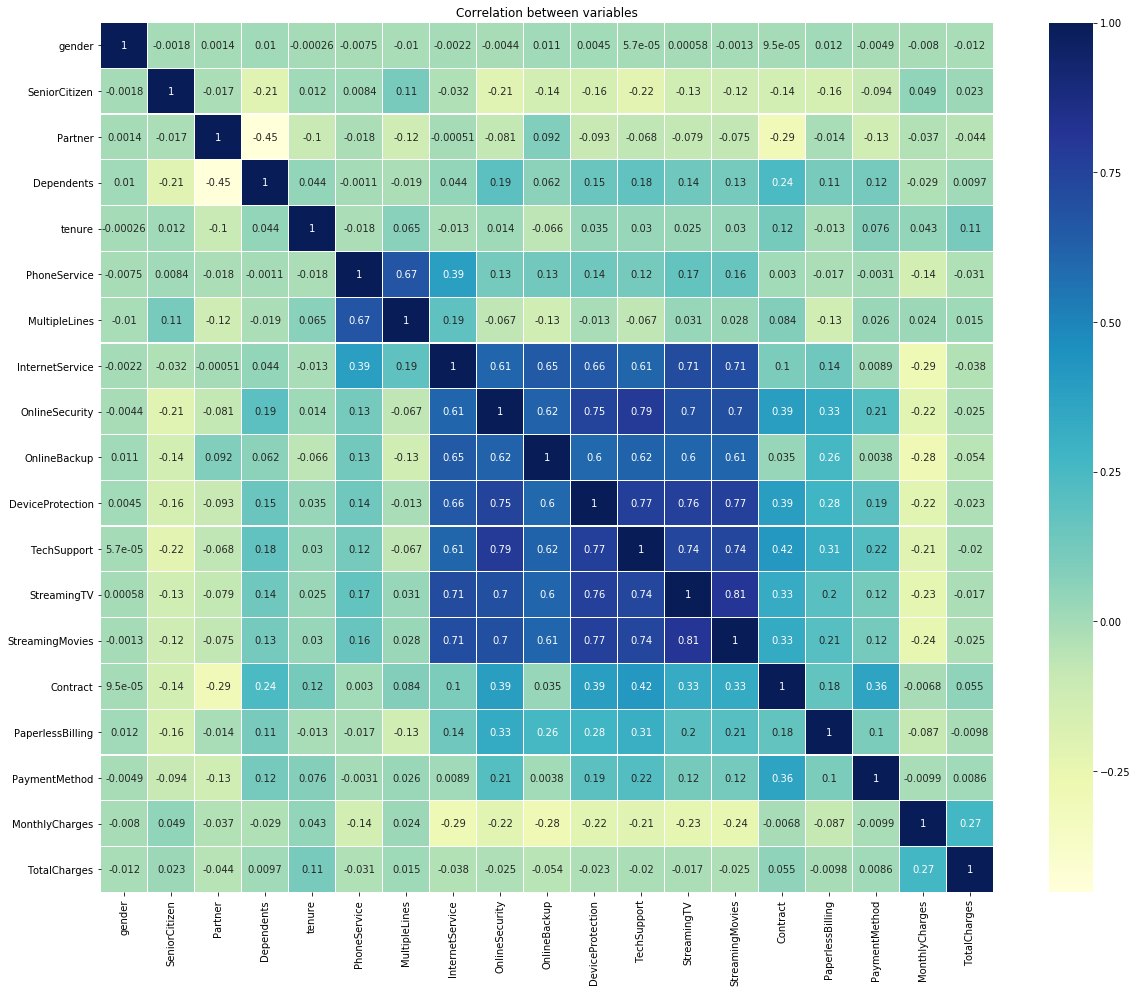

In [76]:
plt.figure(figsize=(20,16))
charges=telcom.iloc[:,1:20]
corr = charges.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu",annot=True)
plt.title("Correlation between variables")

OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies have strong correlations between each other, which means their data point are moving together towards the same direction.
MultipleLines and PhoneService also have strong correlation.

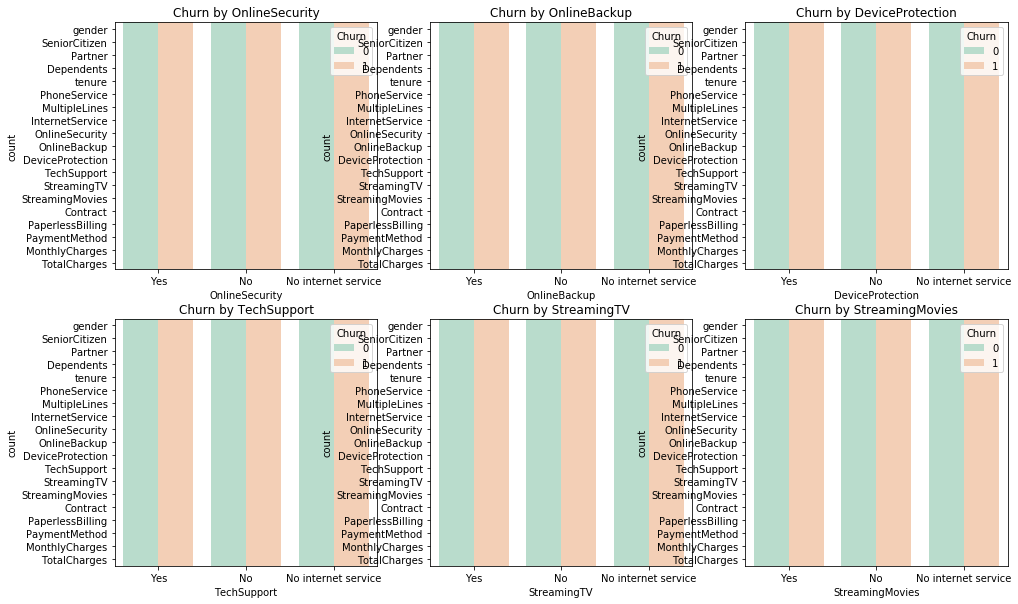

In [77]:
covariables=["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(16,10),sharex=False,sharey=True)
for i, item in enumerate(covariables):
    plt.subplot(2,3,(i+1),sharey=ax)
    ax=sns.countplot(x=item,hue="Churn",data=telcom,palette="Pastel2",order=["Yes","No","No internet service"])
    plt.xlabel(str(item))
    plt.title("Churn by "+str(item))
    i=i+1
plt.show()

Look at these six barcharts, the values are similar, but not exactly the same. That means although they have strong correlation between each other, they can not replace each other. So we will keep all of them for better model training.

However, the churn values of no internet service are all the same within six variables above. It is probably because the six factors above could influence customers' decision making only if the customers are using internet service. 

Therefore we can simply merge "No internet service" value to "No" value.

# Data Preprocess

Firstly, we need to drop CustomerID since it is random characters for each customer. Also we will split variables and target Churn.

As we mentioned previously, "gender" and "PhoneService" have extremely low correlation with "Churn". We can ignore them since they have little influence on customer churn.

In [78]:
telcomvar=telcom.iloc[:,1:20]

In [79]:
def uni(columnlabel):
    print(columnlabel,"--" ,telcomvar[columnlabel].unique())
    
telcomobject=telcomvar.select_dtypes(['object'])
for i in range(0,len(telcomobject.columns)):
    uni(telcomobject.columns[i])

gender -- ['Female' 'Male']
Partner -- ['Yes' 'No']
Dependents -- ['No' 'Yes']
PhoneService -- ['No' 'Yes']
MultipleLines -- ['No phone service' 'No' 'Yes']
InternetService -- ['DSL' 'Fiber optic' 'No']
OnlineSecurity -- ['No' 'Yes' 'No internet service']
OnlineBackup -- ['Yes' 'No' 'No internet service']
DeviceProtection -- ['No' 'Yes' 'No internet service']
TechSupport -- ['No' 'Yes' 'No internet service']
StreamingTV -- ['No' 'Yes' 'No internet service']
StreamingMovies -- ['No' 'Yes' 'No internet service']
Contract -- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -- ['Yes' 'No']
PaymentMethod -- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


As we mentioned previously, the "No internet service" value of six variables is not a determinant for customers who are not using internet service to make churn decision. These customers are not using any internet product. 

Therefore "No internet service" is the same as "No", so we can replace it by using "No".

In [80]:
telcomvar.replace(to_replace='No internet service', value='No', inplace=True)
telcomvar.replace(to_replace='No phone service', value='No', inplace=True)
for i in range(0,len(telcomobject.columns)):
    uni(telcomobject.columns[i])

gender -- ['Female' 'Male']
Partner -- ['Yes' 'No']
Dependents -- ['No' 'Yes']
PhoneService -- ['No' 'Yes']
MultipleLines -- ['No' 'Yes']
InternetService -- ['DSL' 'Fiber optic' 'No']
OnlineSecurity -- ['No' 'Yes']
OnlineBackup -- ['Yes' 'No']
DeviceProtection -- ['No' 'Yes']
TechSupport -- ['No' 'Yes']
StreamingTV -- ['No' 'Yes']
StreamingMovies -- ['No' 'Yes']
Contract -- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -- ['Yes' 'No']
PaymentMethod -- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


### **Feature Importance**

The unique values of the variables above are all categorical. Some of them are binary, and all of them have four or less unique values. Therefore we can convert them into numerical values using Scikit-learn OneHotEncoder

In [81]:
copy=telcomvar.copy()
copyobj=copy.select_dtypes(['object'])
def labelencode(columnlabel):
    copy[columnlabel] = LabelEncoder().fit_transform(copy[columnlabel])

for i in range(0,len(copyobj.columns)):
    labelencode(copyobj.columns[i])

[0.03819698 0.02437279 0.02994326 0.025427   0.16349066 0.00891933
 0.02636338 0.04556982 0.02439612 0.02727286 0.0279067  0.02858176
 0.02265091 0.02226961 0.09264567 0.03311663 0.06213314 0.14490005
 0.15184334]


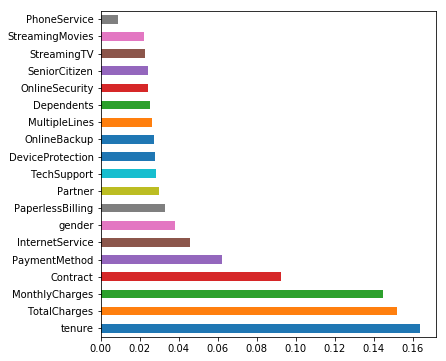

In [82]:
#Feature importance
x=copy
y=telcom['Churn']

from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [83]:
dropvar=["PhoneService"]
telcomvar.drop(columns=dropvar,axis=1, inplace=True)
telcomvar.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


### **ONE HOT ENCODING**

In [84]:
telcomvar = pd.get_dummies(telcomvar)
telcomvar.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0


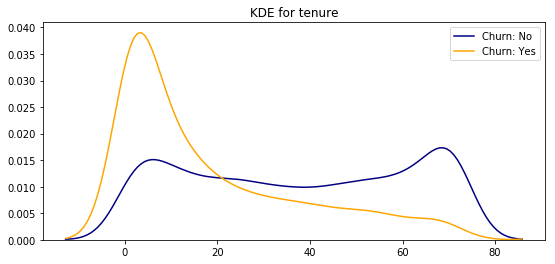

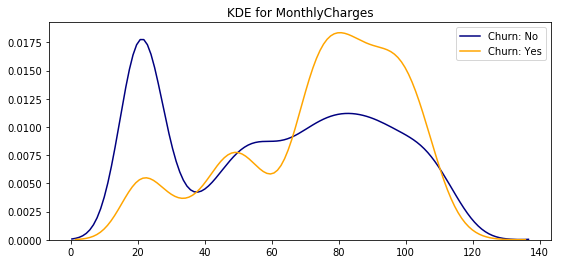

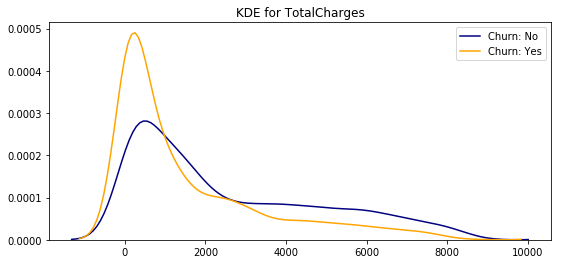

In [85]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(telcom[telcom['Churn'] == 0 ][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(telcom[telcom['Churn'] == 1 ][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

Text(0.5, 1.0, 'Churn by PaymentMethod')

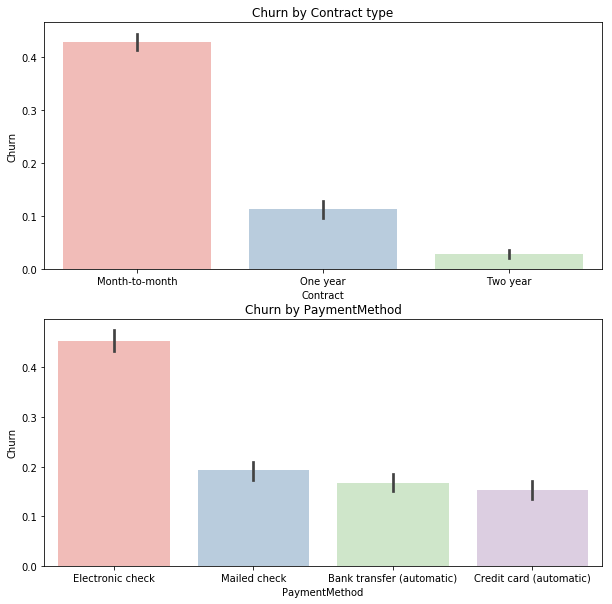

In [86]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))

plt.subplot(2,1,1)
sns.barplot(x="Contract",y="Churn", data=telcom, palette="Pastel1", order= ['Month-to-month', 'One year', 'Two year'])
plt.title("Churn by Contract type")

plt.subplot(2,1,2)
sns.barplot(x="PaymentMethod",y="Churn",data=telcom,palette="Pastel1")
plt.title("Churn by PaymentMethod")

The proportion of Churn customers with Month-to-month contract is larger than One-year-contract and Two-year contract. It may represent that set longe-term contract could be a effective approach to retain existing customers.

In [87]:
scaler = StandardScaler(copy=False)
scaler.fit_transform(telcomvar[['tenure','MonthlyCharges','TotalCharges']])

array([[-1.28024804, -1.16169394, -0.99419409],
       [ 0.06430269, -0.26087792, -0.17373982],
       [-1.23950408, -0.36392329, -0.95964911],
       ...,
       [-0.87280842, -1.17000405, -0.85451414],
       [-1.15801615,  0.31916782, -0.87209546],
       [ 1.36810945,  1.35793167,  2.01234407]])

In [88]:
telcomvar[['tenure','MonthlyCharges','TotalCharges']]=scaler.transform(telcomvar[['tenure','MonthlyCharges','TotalCharges']])

Text(0.5, 1.0, 'Check outliers of standardized tenure, MonthlyCharges and TotalCharges')

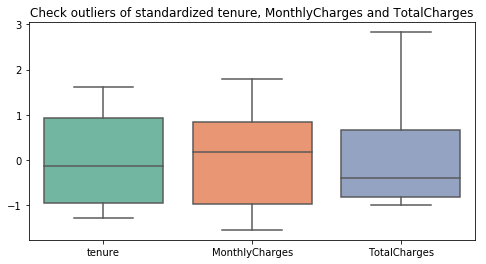

In [89]:
# check outliers
plt.figure(figsize = (8,4))
numbox = sns.boxplot(data=telcomvar[['tenure','MonthlyCharges','TotalCharges']], palette="Set2")
plt.title("Check outliers of standardized tenure, MonthlyCharges and TotalCharges")

No obvious outliers existing within three variables.

# Stratified Cross-Validation - Split training/testing datasets

> Stratified ShuffleSplit cross-validator Provides train/test indices to split data in train/test sets. This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class. Note: like the ShuffleSplit strategy, stratified random splits do not guarantee that all folds will be different, although this is still very likely for sizeable datasets.

-- Scikit-learn organization (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit)

In [90]:
X=telcomvar
y=telcom["Churn"].values

sss=StratifiedShuffleSplit(n_splits=5, test_size=0.2,random_state=0)
sss.get_n_splits(X,y)

5

In [91]:
#So this is the cross-validator that we are using
print(sss)

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2,
            train_size=None)


In [92]:
#Split train/test sets of X and y
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train,X_test=X.iloc[train_index], X.iloc[test_index]
    y_train,y_test=y[train_index], y[test_index]

TRAIN: [3780 1588 2927 ... 3956 6130 6814] TEST: [5126 2423 2498 ... 6703 6618 6010]
TRAIN: [6916 6953 5388 ... 6156 3262 3471] TEST: [4097 4734 2309 ... 1278 1724 5508]
TRAIN: [1218 2877 3756 ...  848 4568 6967] TEST: [ 133 1822 5303 ... 3150 5611 4569]
TRAIN: [2552 4723 2055 ... 4030 2165 1994] TEST: [ 233  438 4434 ... 4625 1121 3422]
TRAIN: [4040 1561 6463 ... 2550 6727 4009] TEST: [4581 3898 3153 ... 2095 1765 2249]


In [93]:
#Let's see the number of sets in each class of training and testing datasets
print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())

0    4130
1    1495
dtype: int64
0    1033
1     374
dtype: int64


# Oversampling training set

In [94]:
from imblearn.over_sampling import ADASYN
ada= ADASYN()
X_resample,y_resample=ada.fit_sample(X_train,y_train)

In [95]:
#concat oversampled "x" and "y" into one DataFrame
X_resample=pd.DataFrame(X_resample)
y_resample=pd.DataFrame(y_resample)
#replace column labels using the labels of original datasets
X_resample.columns=telcomvar.columns
y_resample.columns=["Churn"]

In [96]:
y_resample["Churn"].value_counts()

0    4130
1    4112
Name: Churn, dtype: int64

# Models training and comparison

In [97]:
Classifiers=[["Support Vector Machine",SVC()],
             ["LogisticRegression",LogisticRegression()],
             ["Naive Bayes",GaussianNB()],
             ["Decision Tree",DecisionTreeClassifier()],
             ["Random Forest",RandomForestClassifier()],
             ["AdaBoostClassifier", AdaBoostClassifier()],
]

names=[]
prediction=[]
Classify_result=[]
for name,classifier in Classifiers:
    classifier=classifier
    classifier.fit(X_resample,y_resample)
    y_pred=classifier.predict(X_test)
    recall=recall_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    f_score=f1_score(y_test,y_pred)
    class_eva=pd.DataFrame([recall,precision,f_score])
    Classify_result.append(class_eva)
    name=pd.Series(name)
    names.append(name)
    y_pred=pd.Series(y_pred)
    prediction.append(y_pred)


In [98]:
names=pd.DataFrame(names)
names=names[0].tolist()
result=pd.concat(Classify_result,axis=1)
result.columns=names
result.index=["recall","precision","f-socre"]
result

,Support Vector Machine,LogisticRegression,Naive Bayes,Decision Tree,Random Forest,AdaBoostClassifier
recall,0.863636,0.850267,0.823529,0.561497,0.505348,0.762032
precision,0.472222,0.489985,0.489666,0.468750,0.564179,0.529740
f-socre,0.610586,0.621701,0.614158,0.510949,0.533145,0.625000


In [99]:
prediction=pd.DataFrame(prediction)
y_pred_svc=np.array(prediction.iloc[0,:])
y_pred_lr=np.array(prediction.iloc[1,:])
y_pred_NB=np.array(prediction.iloc[2,:])
y_pred_dt=np.array(prediction.iloc[3,:])
y_pred_rf=np.array(prediction.iloc[4,:])
y_pred_AdaB=np.array(prediction.iloc[5,:])

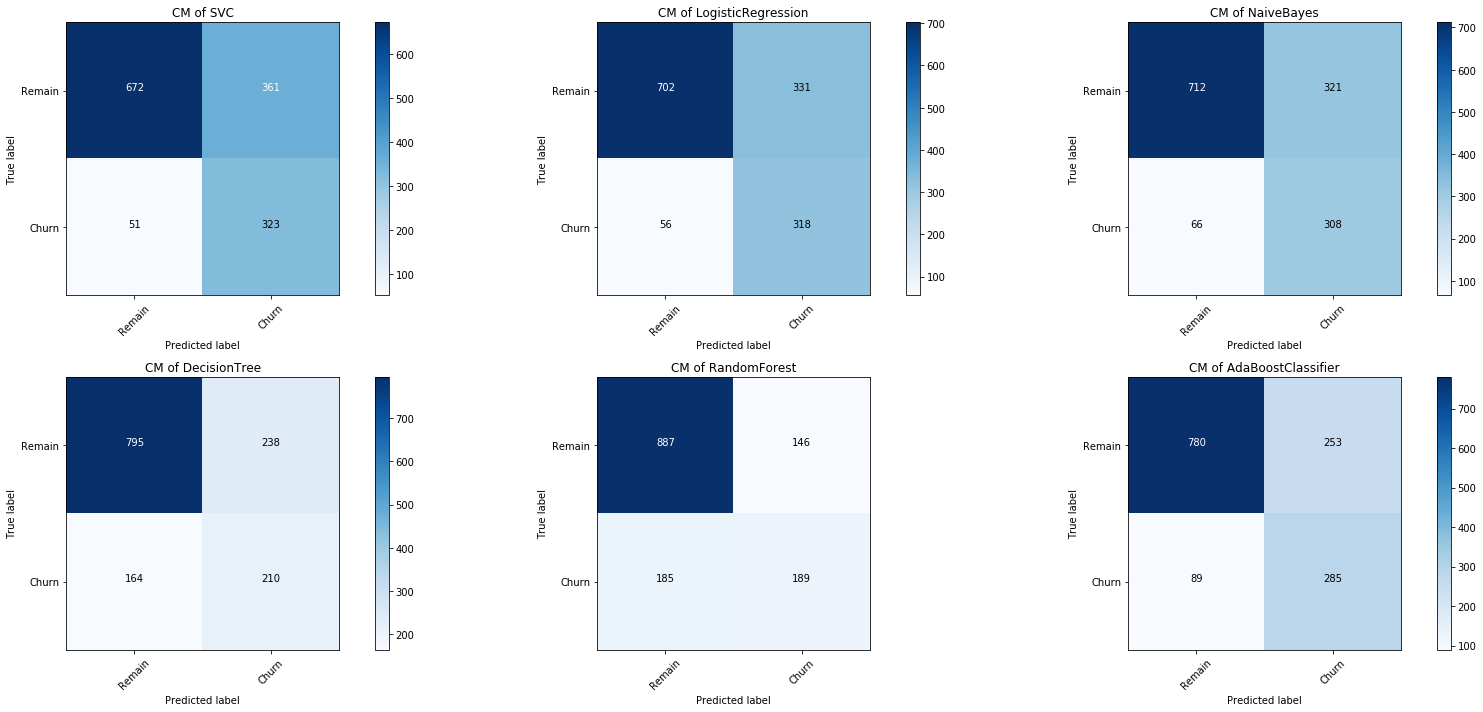

In [100]:
predictions=[y_pred_svc,y_pred_lr, y_pred_NB, y_pred_dt, y_pred_rf, y_pred_AdaB]

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(25,10))
for i, item in enumerate(predictions):
    plt.subplot(2,3,(i+1))
    cnf_matrix = confusion_matrix(y_test,item)
    class_names = ["Remain","Churn"]
    title_label=["SVC","LogisticRegression","NaiveBayes","DecisionTree", "RandomForest","AdaBoostClassifier"]
    plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='CM of '+str(title_label[i]))
    i=i+1
plt.show()

In [101]:
from sklearn.ensemble import VotingClassifier
clf1 = GaussianNB()
clf2 = SVC(probability=True)
clf3 = LogisticRegression()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
eclf1.fit(X_resample, y_resample)
y_pred1= eclf1.predict(X_test)
labels=["Remain","Churn"]


In [102]:
print(classification_report(y_test, y_pred1 ,target_names=labels,digits=5))

              precision    recall  f1-score   support

      Remain    0.92109   0.68925   0.78848      1033
       Churn    0.49369   0.83690   0.62103       374

   micro avg    0.72850   0.72850   0.72850      1407
   macro avg    0.70739   0.76308   0.70476      1407
weighted avg    0.80748   0.72850   0.74397      1407



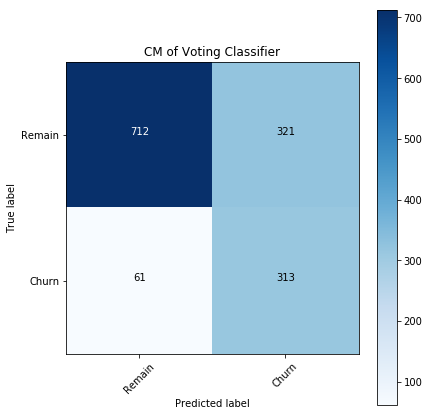

In [103]:
cnf_matrix = confusion_matrix(y_test,y_pred1)
class_names = ["Remain","Churn"]
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='CM of Voting Classifier')

plt.show()

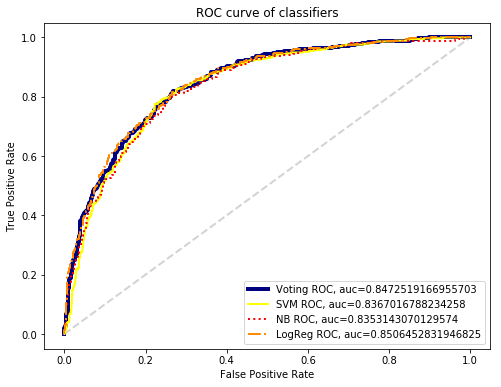

In [104]:
# compute AUC and plot RPC curve
plt.figure(figsize=(8,6))
y_pred_proba1 = eclf1.predict_proba(X_test)[::,1]
fpr1, tpr1, _1 = roc_curve(y_test,  y_pred_proba1)
auc1 = roc_auc_score(y_test, y_pred_proba1)

svc = SVC(probability=True).fit(X_resample,y_resample)
y_pred_probasvc= svc.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_probasvc)
aucsvc = roc_auc_score(y_test, y_pred_probasvc)

NB = GaussianNB().fit(X_resample,y_resample)
y_pred_probaNB= NB.predict_proba(X_test)[::,1]
fpr2, tpr2, _2 = roc_curve(y_test,  y_pred_probaNB)
aucNB = roc_auc_score(y_test, y_pred_probaNB)

lrg = LogisticRegression().fit(X_resample,y_resample)
y_pred_probalrg= lrg.predict_proba(X_test)[::,1]
fpr3, tpr3, _3 = roc_curve(y_test,  y_pred_probalrg)
auclrg = roc_auc_score(y_test, y_pred_probalrg)



lw=2
plt.plot([0, 1], [0, 1], color='lightgray', lw=lw, linestyle='--')

plt.plot(fpr1,tpr1,
         label="Voting ROC, auc="+str(auc1), 
         color='navy', linewidth=4)


plt.plot(fpr, tpr,
         label='SVM ROC, auc='+str(aucsvc),
         color='yellow', linestyle='-',  linewidth=2)

plt.plot(fpr2, tpr2,
         label='NB ROC, auc='+str(aucNB),
         color='red', linestyle=':',  linewidth=2)

plt.plot(fpr3, tpr3,
         label='LogReg ROC, auc='+str(auclrg),
         color='darkorange', linestyle='-.',  linewidth=2)

plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve of classifiers")
plt.legend(loc="lower right")

plt.show()

# PCA implementation

Now we are steping in the second part, Clustering for customer segmentation. In this part, we are not going to split training or testing data set. So we need to apply PCA to data in "telcomvar". 

Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [105]:
y_pred= pd.DataFrame(np.array(prediction.iloc[1,:]))
churn_test=y_pred[y_pred[0]==1].index
churner_index= X_test.iloc[churn_test,:].index
churner=telcom.iloc[churner_index,1:20]
churner_var = pd.get_dummies(churner)
n=len(churner_var.columns)

In [106]:
#Firstly, we need to check cumulative explained variance ratio to find out how many dimensions are necessary.
pca=PCA(n_components=n,random_state=0)
transpca=pca.fit_transform(churner_var)

In [107]:
print("Explained Variance Ratio => {}\n".format(pca.explained_variance_ratio_))
print("Explained Variance Ratio(csum) => {}\n".format(pca.explained_variance_ratio_.cumsum()))

Explained Variance Ratio => [9.99870953e-01 1.12652737e-04 1.52068431e-05 1.96366451e-07
 1.12435015e-07 9.85208589e-08 9.55370278e-08 8.18068620e-08
 7.27528824e-08 6.35095741e-08 5.90742150e-08 5.81889767e-08
 4.93354359e-08 4.39702632e-08 4.14646912e-08 3.89356541e-08
 3.74515240e-08 3.65398704e-08 3.07668201e-08 2.67003280e-08
 2.28333359e-08 2.11439604e-08 1.90976855e-10 9.76446275e-33
 9.76446275e-33 9.76446275e-33 9.76446275e-33 9.76446275e-33
 9.76446275e-33 9.76446275e-33 9.76446275e-33 9.76446275e-33
 9.76446275e-33 9.76446275e-33 9.76446275e-33 9.76446275e-33
 9.76446275e-33 9.76446275e-33 9.76446275e-33 9.76446275e-33
 9.76446275e-33 9.76446275e-33 9.76446275e-33 9.76446275e-33
 9.76446275e-33]

Explained Variance Ratio(csum) => [0.99987095 0.99998361 0.99999881 0.99999901 0.99999912 0.99999922
 0.99999932 0.9999994  0.99999947 0.99999953 0.99999959 0.99999965
 0.9999997  0.99999974 0.99999979 0.99999982 0.99999986 0.9999999
 0.99999993 0.99999996 0.99999998 1.         1.  

From the *cumulative explained variance ratio* we can see that 99.998% variance is covered by first two dimension. Therefore we can reduce dimentionality to **two dimensions** to reduce the complexity of the problem.

Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained.

In [108]:
pca=PCA(n_components=2,random_state=0)
transpca=pca.fit_transform(churner_var)
reduced_data=pd.DataFrame(transpca,columns=['D_1','D_2'])
reduced_data.head()

,D_1,D_2
0,4514.959500,15.199044
1,1169.617148,14.783592
2,-2219.119640,-15.682697
3,6.813671,-10.748624
4,-1535.262285,-37.674552


In [109]:
def biplot(churner_var, reduced_data, pca):
    '''
    Produce a biplot that shows a scatterplot of the reduced
    data and the projections of the original features.
    
    good_data: original data, before transformation.
               Needs to be a pandas dataframe with valid column names
    reduced_data: the reduced data (the first two dimensions are plotted)
    pca: pca object that contains the components_ attribute

    return: a matplotlib AxesSubplot object (for any additional customization)
    
    This procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot
    '''

    fig, ax = plt.subplots(figsize = (14,8))
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'D_1'], y=reduced_data.loc[:, 'D_2'], 
        facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("2-Dimension Visualization of Predicted Churn Customer Data", fontsize=16);
    return ax

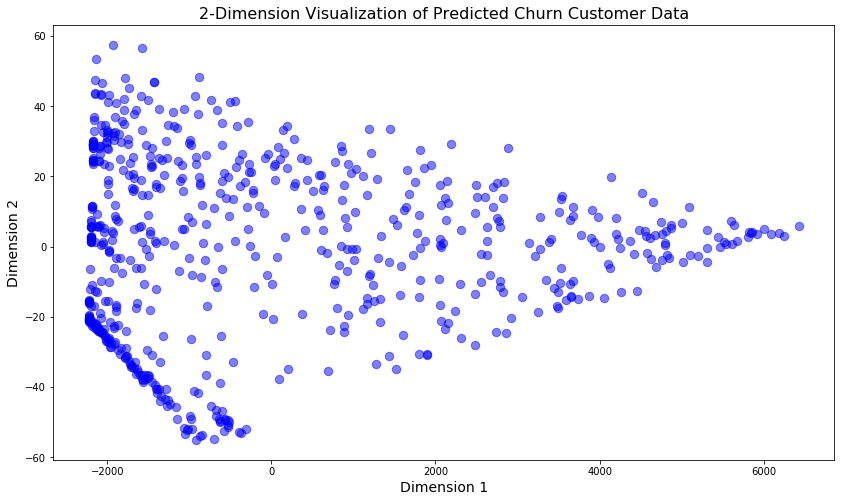

In [110]:
biplot(churner_var, reduced_data, pca)

# Clustering with K-means

In [111]:
def sil_coeff(no_clusters):
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer_1 = KMeans(n_clusters=no_clusters, random_state=0 )
    clusterer_1.fit(reduced_data)
    
    # Predict the cluster for each data point
    preds_1 = clusterer_1.predict(reduced_data)
    
    # Find the cluster centers
    centers_1 = clusterer_1.cluster_centers_

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds_1)
    
    print("silhouette coefficient for `{}` clusters => {:.4f}".format(no_clusters, score))
    
clusters_range = range(2,16)
for i in clusters_range:
    sil_coeff(i)

silhouette coefficient for `2` clusters => 0.7027
silhouette coefficient for `3` clusters => 0.6767
silhouette coefficient for `4` clusters => 0.6301
silhouette coefficient for `5` clusters => 0.6251
silhouette coefficient for `6` clusters => 0.6161
silhouette coefficient for `7` clusters => 0.5846
silhouette coefficient for `8` clusters => 0.5810
silhouette coefficient for `9` clusters => 0.5874
silhouette coefficient for `10` clusters => 0.6025
silhouette coefficient for `11` clusters => 0.5996
silhouette coefficient for `12` clusters => 0.6006
silhouette coefficient for `13` clusters => 0.5906
silhouette coefficient for `14` clusters => 0.5693
silhouette coefficient for `15` clusters => 0.5649


2 clusters got highest silhouette score at 0.7031 which is the highest score. Therefore we can assign churn customers into 2 segments.

Before visualizing the clusters, let's select six samples as examples.

In [112]:
samples = churner.sample(n=6)
indices= samples.index
print("Indices of Samples => {}".format(indices))

# Create a DataFrame of the chosen samples
samples_info = pd.DataFrame(telcom.loc[indices],columns = telcom.keys()).reset_index(drop = True).iloc[:,:20]
print("\nChosen samples of telecom customers dataset:")
display(samples_info)

# Apply PCA on samples
samples_var= pd.DataFrame(churner_var.loc[indices], columns = churner_var.keys()).reset_index(drop = True)
pca=PCA(n_components=2,random_state=0, svd_solver='full')
transam=pca.fit_transform(samples_var)
pca_samples=pd.DataFrame(transam,columns=['D_1','D_2'])

Indices of Samples => Int64Index([6815, 4079, 1963, 446, 6228, 5727], dtype='int64')

Chosen samples of telecom customers dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0270-THENM,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Bank transfer (automatic),69.85,5102.35
1,5606-AMZBO,Female,0,Yes,No,10,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),78.15,765.15
2,7967-HYCDE,Male,0,No,No,8,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),70.70,553.40
3,4110-PFEUZ,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Mailed check,69.55,69.55
4,8597-CTXVJ,Male,0,No,Yes,70,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),64.95,4551.50
5,8707-HOEDG,Female,0,Yes,Yes,70,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,110.20,7689.80


In [113]:
def cluster_results(reduced_data, preds, centers, pca_samples):
    
#Visualizes the PCA-reduced cluster data in two dimensions
#Adds cues for cluster centers and selected sample data
    
    predictions = pd.DataFrame(preds, columns = ['Cluster']) 
    plot_data = pd.concat([predictions, reduced_data], axis = 1)
    
    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (14,8))

    # Color map
    cmap = cm.get_cmap('gist_rainbow')

    # Color the points based on assigned cluster
    for i, cluster in plot_data.groupby('Cluster'):   
        cluster.plot(ax = ax, kind = 'scatter', x = 'D_1', y = 'D_2', \
                     color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

    # Plot centers with indicators
    for i, c in enumerate(centers):
        ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
                   alpha = 1, linewidth = 2, marker = 'o', s=200);
        ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

    # Plot transformed sample points 
    ax.scatter(x = pca_samples.iloc[:,0], y = pca_samples.iloc[:,1], \
               s = 150, linewidth = 4, color = 'black', marker = 'x');

# Set plot title
    ax.set_title("2 Segments of Predicted Churn Customers - Samples Marked by Black Cross");


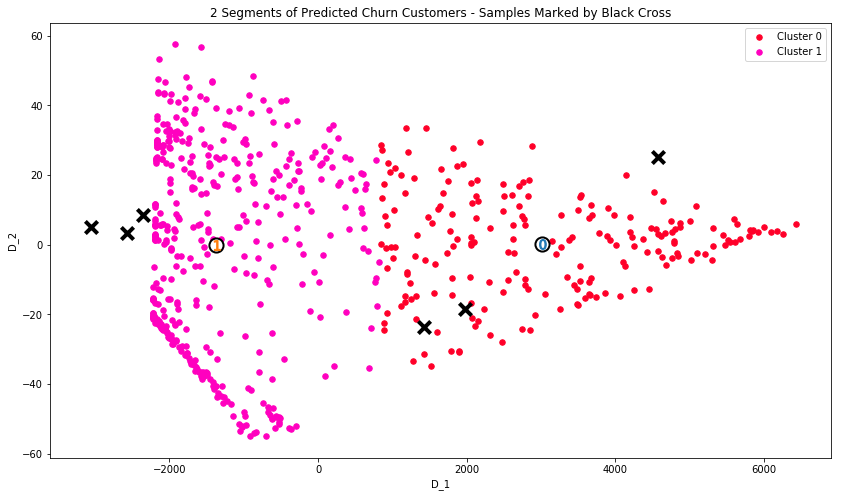

In [114]:
# Display the results of the clustering from implementation for 3 clusters
clusterer = KMeans(n_clusters = 2)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(pca_samples)

cluster_results(reduced_data, preds, centers, pca_samples)

# Data Recovery

In [115]:
#Data Recovery
st_centers = pca.inverse_transform(centers)

# Display the centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(st_centers), columns = churner_var.keys())
true_centers.index = segments
display(true_centers)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
Segment 0,-0.0,71.0,87.0,6139.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,-0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,-0.0
Segment 1,0.0,24.0,73.0,1749.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Segments that samples belonging to 

In [116]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1
Sample point 3 predicted to be in Cluster 1
Sample point 4 predicted to be in Cluster 0
Sample point 5 predicted to be in Cluster 0
